In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


**Import Necessary Libraries**

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


**Loading The Dataset**

In [3]:
iris = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv",encoding='latin')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape


(150, 5)

**Understand The Dataset**

In [5]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Checking Null values
iris.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
iris = iris[["petal_length","petal_width"]]
iris

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [9]:
iris.shape

(150, 2)

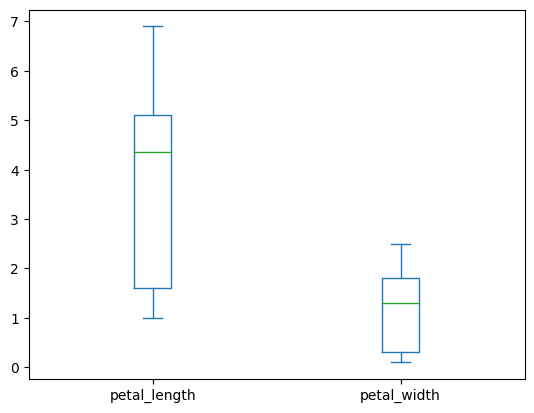

In [10]:
# to check the Outlier
iris.plot(kind="box")
plt.show()

**To Find The Correlation Coefficient**

In [11]:
iris.corr()


,petal_length,petal_width
petal_length,1.000000,0.962757
petal_width,0.962757,1.000000


In [12]:
x = iris["petal_length"]
y = iris["petal_width"]

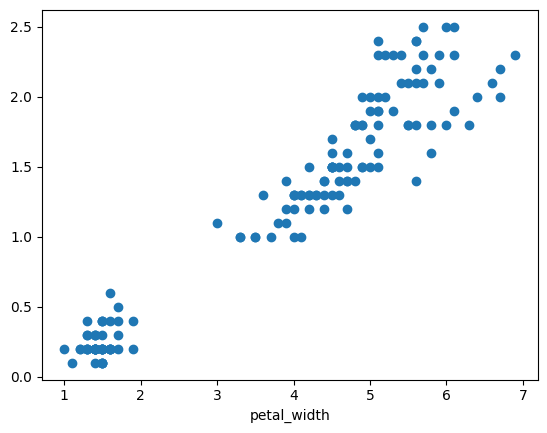

In [13]:
plt.scatter(x,y)
plt.xlabel("petal_length")
plt.xlabel("petal_width")
plt.show()

**Splitting The Dataset Into Train data and Test data**

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state=20)
x_train

95     4.2
88     4.1
0      1.4
46     1.6
11     1.6
      ... 
22     1.0
75     4.4
137    5.5
15     1.5
99     4.1
Name: petal_length, Length: 120, dtype: float64

**Changing The Input Data Into Two Dimensional Array**

In [15]:
x_train = np.array(x_train).reshape(-1,1)
x_train

array([[4.2],
       [4.1],
       [1.4],
       [1.6],
       [1.6],
       [4.5],
       [4.5],
       [1.4],
       [4.5],
       [6.1],
       [4.5],
       [5.6],
       [1.5],
       [4.4],
       [4.7],
       [1.3],
       [1.7],
       [1.4],
       [5. ],
       [1.9],
       [5.6],
       [5.4],
       [1.5],
       [6. ],
       [4. ],
       [3.6],
       [4.5],
       [1.3],
       [1.5],
       [3.8],
       [4.3],
       [4. ],
       [3.9],
       [4.7],
       [4.6],
       [4.2],
       [1.7],
       [4.5],
       [4.4],
       [1.5],
       [1.3],
       [4.5],
       [4. ],
       [4.6],
       [1.5],
       [1.5],
       [5.3],
       [1.3],
       [1.6],
       [3.5],
       [4.8],
       [5.1],
       [4.9],
       [5.6],
       [5.6],
       [5.9],
       [3.9],
       [5.5],
       [6.1],
       [6.1],
       [1.4],
       [5.5],
       [1.5],
       [1.4],
       [1.2],
       [5.2],
       [4.9],
       [4.8],
       [5.4],
       [4.9],
       [4.2],
      

In [16]:
x_test = np.array(x_test).reshape(-1,1)
x_test

array([[1.4],
       [4.7],
       [4.3],
       [5.8],
       [4.1],
       [4. ],
       [5.9],
       [1.5],
       [5.8],
       [1.4],
       [5.2],
       [4.8],
       [5. ],
       [1.2],
       [1.4],
       [6.7],
       [1.1],
       [4.6],
       [5.1],
       [3.3],
       [4.7],
       [5.1],
       [5.3],
       [1.7],
       [4.9],
       [3.7],
       [3. ],
       [1.5],
       [5.8],
       [5.1]])

**To Implement The Linear Regression**

In [17]:
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
#To find the intercept
c = lr.intercept_
c

-0.3717018549705138

In [19]:
#To find the coefficient
m=lr.coef_
m

array([0.42271533])

**To predict the Simple Linear Regression**

In [20]:
y_train_predict = lr.predict(x_train)
y_train_predict

array([1.40370253, 1.361431  , 0.22009961, 0.30464267, 0.30464267,
       1.53051713, 1.53051713, 0.22009961, 1.53051713, 2.20686166,
       1.53051713, 1.99550399, 0.26237114, 1.4882456 , 1.6150602 ,
       0.17782807, 0.34691421, 0.22009961, 1.7418748 , 0.43145727,
       1.99550399, 1.91096093, 0.26237114, 2.16459013, 1.31915947,
       1.15007333, 1.53051713, 0.17782807, 0.26237114, 1.2346164 ,
       1.44597406, 1.31915947, 1.27688793, 1.6150602 , 1.57278866,
       1.40370253, 0.34691421, 1.53051713, 1.4882456 , 0.26237114,
       0.17782807, 1.53051713, 1.31915947, 1.57278866, 0.26237114,
       0.26237114, 1.86868939, 0.17782807, 0.30464267, 1.1078018 ,
       1.65733173, 1.78414633, 1.69960326, 1.99550399, 1.99550399,
       2.12231859, 1.27688793, 1.95323246, 2.20686166, 2.20686166,
       0.22009961, 1.95323246, 0.26237114, 0.22009961, 0.13555654,
       1.82641786, 1.69960326, 1.65733173, 1.91096093, 1.69960326,
       1.40370253, 0.17782807, 1.69960326, 0.22009961, 1.02325

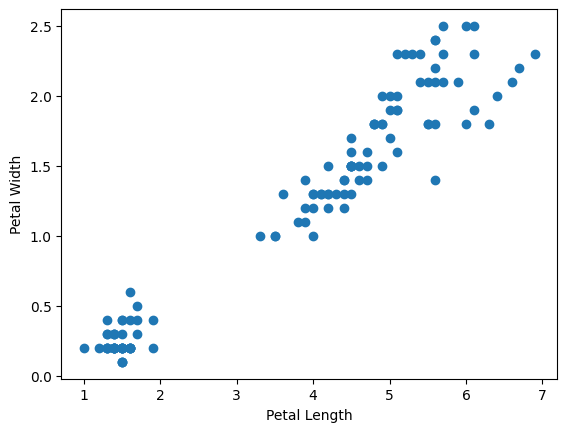

In [21]:
plt.scatter(x_train,y_train)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()


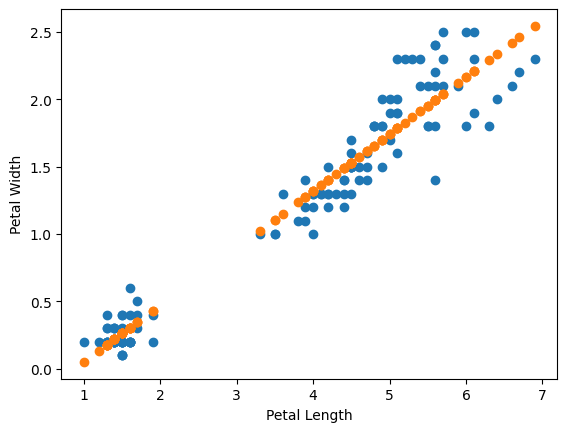

In [22]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,y_train_predict)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

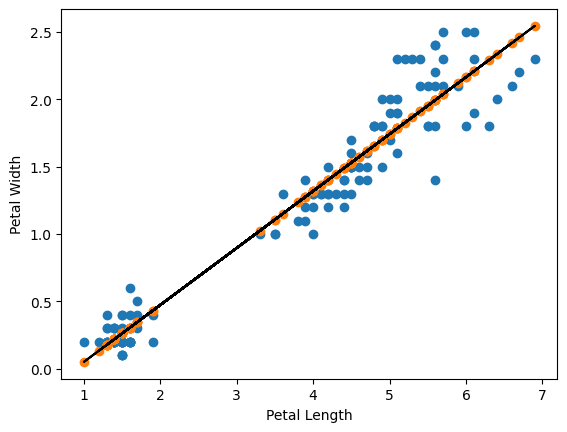

In [23]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,y_train_predict)
plt.plot(x_train,y_train_predict,color="black")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()


**To Predict The Test data**

In [24]:
iris

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [25]:
x_test

array([[1.4],
       [4.7],
       [4.3],
       [5.8],
       [4.1],
       [4. ],
       [5.9],
       [1.5],
       [5.8],
       [1.4],
       [5.2],
       [4.8],
       [5. ],
       [1.2],
       [1.4],
       [6.7],
       [1.1],
       [4.6],
       [5.1],
       [3.3],
       [4.7],
       [5.1],
       [5.3],
       [1.7],
       [4.9],
       [3.7],
       [3. ],
       [1.5],
       [5.8],
       [5.1]])

In [26]:
y_predict_test = lr.predict([[5.4]])
y_predict_test

array([1.91096093])

In [27]:
y_predict_test = lr.predict(x_test)
y_predict_test

array([0.22009961, 1.6150602 , 1.44597406, 2.08004706, 1.361431  ,
       1.31915947, 2.12231859, 0.26237114, 2.08004706, 0.22009961,
       1.82641786, 1.65733173, 1.7418748 , 0.13555654, 0.22009961,
       2.46049086, 0.09328501, 1.57278866, 1.78414633, 1.02325873,
       1.6150602 , 1.78414633, 1.86868939, 0.34691421, 1.69960326,
       1.19234487, 0.89644414, 0.26237114, 2.08004706, 1.78414633])

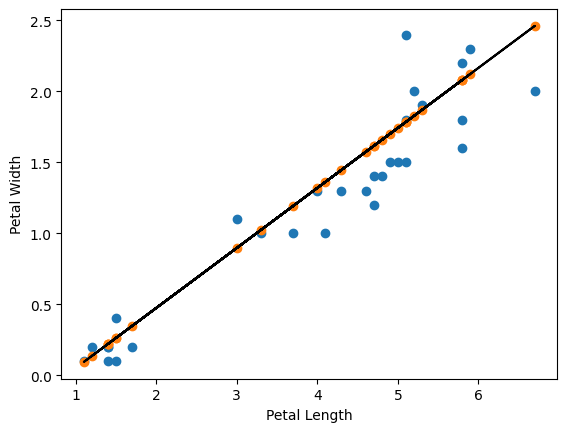

In [28]:
#Hence the fully trained model is repesenting predictive results in graph form
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_predict_test)
plt.plot(x_test,y_predict_test,color="black")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

**Thank You**